# Cellpose

https://nbviewer.org/github/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from cellpose.io import imread
import os

In [8]:
test_path = "/Users/beatrizfernandes/PIC2/tasks instantdl/nuclei2d_instance_segmentation/cellpose/test/"

In [69]:
model = models.Cellpose(model_type='cyto')
imgs = []
for image_id in list(filter(lambda element: '.DS_Store' not in element, os.listdir(test_path))):
    image_path = "{0}{1}/image/{1}.png".format(test_path, image_id)
    img = imread(image_path)
    imgs.append(img)

channels = [[0,0]]  
masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)

libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG
libpng warning: PLTE: ignored in grayscale PNG


In [70]:
def mask_label(labels):
    n_pred = np.unique(labels) -1
    masks = np.zeros((labels.shape[0], labels.shape[1], len(n_pred)-1))

    for pred in np.arange(len(n_pred)-1):
        masks[:,:,pred] = np.sign(labels*[labels == pred + 1])

    return masks

In [71]:
segmentation_2d_path = "/Users/beatrizfernandes/PIC2/tasks instantdl/nuclei2d_instance_segmentation/cellpose/test/"
segmentation_2d_results_path = "/Users/beatrizfernandes/PIC2/tasks instantdl/nuclei2d_instance_segmentation/cellpose/results/"
if not os.path.exists(segmentation_2d_results_path): os.makedirs(segmentation_2d_results_path)

In [78]:
bb = []

for i in np.arange(21):
    bb.append(len(np.unique(masks[i]))-1)

In [80]:
np.array(bb).std()

707.4748459107022

In [73]:
for i, image_id in enumerate(list(filter(lambda element: '.DS_Store' not in element, os.listdir(segmentation_2d_path)))):
    image_path = "{0}{1}/image/{1}.png".format(segmentation_2d_path, image_id)
    img = plt.imread(image_path)
    msk = mask_label(masks[i])
    print(image_id)
    np.save("{}{}.npy".format(segmentation_2d_results_path, image_id), msk, allow_pickle=True)

image_004_nuclei2d
image_005_nuclei2d
image_019_nuclei2d
image_018_nuclei2d
image_013_nuclei2d
image_012_nuclei2d
image_020_nuclei2d
image_021_nuclei2d
image_014_nuclei2d
image_015_nuclei2d
image_009_nuclei2d
image_008_nuclei2d
image_003_nuclei2d
image_002_nuclei2d
image_010_nuclei2d
image_011_nuclei2d
image_007_nuclei2d
image_006_nuclei2d
image_001_nuclei2d
image_017_nuclei2d
image_016_nuclei2d


In [65]:
masks[20]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

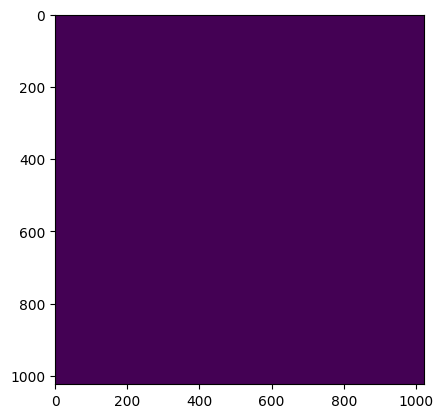

In [32]:
plt.imshow(np.array(masks[0]*[masks[0] == 3])[0])

In [51]:
model0 = models.Cellpose(model_type='cyto')
masks0, flows0, styles0, diams0 = model0.eval(imgs, diameter=None, channels=channels)

In [59]:
np.unique(masks0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118], dtype=uint16)

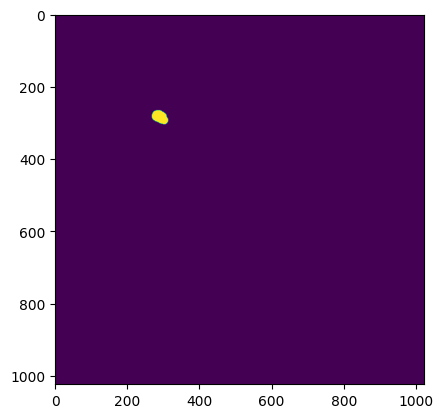

In [54]:
plt.imshow(np.array(masks0[0]*[masks0[0] == 12])[0])

In [4]:
# # model_type='cyto' or 'nuclei' or 'cyto2'
# model = models.Cellpose(model_type='cyto')

# # list of files
# # PUT PATH TO YOUR FILES HERE!
# files = ['/media/carsen/DATA1/TIFFS/onechan.tif']

# imgs = [imread(f) for f in files]
# nimg = len(imgs)

# # define CHANNELS to run segementation on
# # grayscale=0, R=1, G=2, B=3
# # channels = [cytoplasm, nucleus]
# # if NUCLEUS channel does not exist, set the second channel to 0
# channels = [[0,0]]
# # IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# # channels = [0,0] # IF YOU HAVE GRAYSCALE
# # channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# # channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# # if diameter is set to None, the size of the cells is estimated on a per image basis
# # you can set the average cell `diameter` in pixels yourself (recommended)
# # diameter can be a list or a single number for all images


# masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)

FileNotFoundError: [Errno 2] No such file or directory: '/media/carsen/DATA1/TIFFS/onechan.tif'

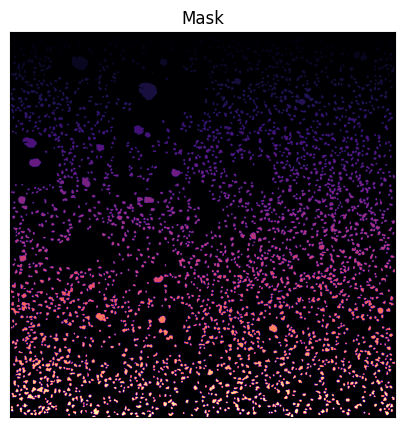

In [81]:
path_auxiliary = '/Users/beatrizfernandes/Documents/Biomédica@IST/Mestrado/PIC2/auxiliary/'

plt.figure(figsize=(5,5))
plt.imshow(masks[16], cmap='magma')
plt.title('Mask')
plt.tick_params(left = False, bottom = False, labelbottom = False, labelleft=False)
plt.savefig(path_auxiliary + "cellpose011.png", dpi = 600)
plt.show()